In [1]:
# EXP 01: Ko Upsampling, Ko Scale. Model: XGBOOST, RFC, GRADIENTBOOSTING
# EXP 02: Ko Upsampling, Scale. Model : Log, Xgboost, Rfc, Grad
# Exp 03: Up Samplong bằng SMOTE, ko scale: XGBOOST, RFC, GRADIENTBOOSTING
# Exp 04: Up Sampling, Scale: Log, XGB, RFC, Grad

# Exp 01:  Upsampling, Scale: Thử với log
# Exp 2: Không Upsampling, Ko scale: thử với XgBoost

In [ ]:
!pip install xgboost
!pip install imbalanced-learn
!pip install category_encoders

In [2]:
# Import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
import category_encoders as ce
from imblearn.over_sampling import SMOTE, SVMSMOTE

ĐỌC DỮ LIỆU

In [3]:
customers_data = pd.read_csv("/content/train.csv")

In [ ]:
customers_data

XEM QUA DỮ LIỆU


In [ ]:
customers_data.info()

In [ ]:
customers_data.isnull().sum()

In [7]:
object_cols = [f for f in customers_data.columns if customers_data[f].dtype == "O"]
print(object_cols)

['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']


In [ ]:
for col in object_cols:
  customers_data[col].value_counts().plot(kind="bar", figsize = (15,5))
  plt.title(col)
  plt.show()

In [9]:
numeric_cols = [f for f in customers_data.columns if customers_data[f].dtype != "O"]
print(numeric_cols)


['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']


In [ ]:
for col in numeric_cols:
  customers_data[col].hist()
  plt.title(col)
  plt.show()

In [ ]:
for col in numeric_cols:
  customers_data.boxplot(column = [col])
  plt.title(col)
  plt.show()

TIỀN XỬ LÝ DỮU LIỆU

In [12]:
dataset = customers_data.copy()

In [ ]:
dataset

In [17]:
he = ce.HashingEncoder(cols = "state")
dataset_hash = he.fit_transform(dataset)

In [ ]:
dataset_hash

In [ ]:
dataset_hash_dummy = pd.get_dummies(dataset_hash, drop_first = True)
dataset_hash_dummy

In [ ]:
corr = dataset_hash_dummy.corr()
corr.style.background_gradient(cmap = 'coolwarm').set_precision(2)

In [24]:
dataset_hash_dummy_drop_corr = dataset_hash_dummy.drop(columns=["voice_mail_plan_yes","total_day_charge","total_eve_charge","total_night_charge","total_intl_charge"])


Exp 01: Upsampling = SMOTE, Scale = MINMAX và thử với Logistic

In [25]:
# SMOTE & Scale
X = dataset_hash_dummy_drop_corr.drop(["churn_yes"],axis=1)
y = dataset_hash_dummy_drop_corr['churn_yes']

# Chia train ,test
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=42)

# Upsampling = SMOTE
sm = SMOTE(k_neighbors=5)
X_train_resample, y_train_resample = sm.fit_resample(X_train,y_train)

#Scale

scale_columns = ['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_eve_minutes', 'total_eve_calls',
       'total_night_minutes', 'total_night_calls', 'total_intl_minutes',
       'total_intl_calls', 'number_customer_service_calls']



scaler = MinMaxScaler()
scaler.fit(X_train_resample[scale_columns])
X_train_resample[scale_columns] = scaler.transform(X_train_resample[scale_columns])
X_test[scale_columns] = scaler.transform(X_test[scale_columns])
     

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       721
           1       0.57      0.33      0.41       129

    accuracy                           0.86       850
   macro avg       0.73      0.64      0.67       850
weighted avg       0.84      0.86      0.84       850



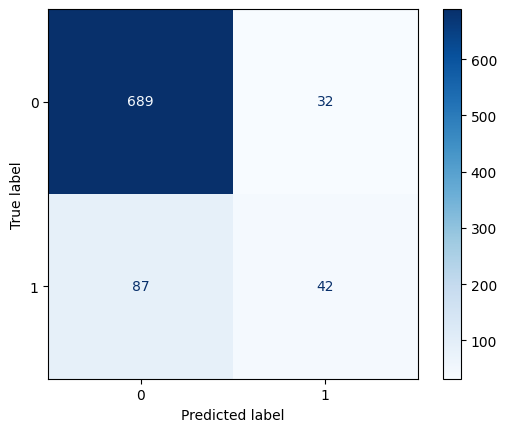

In [35]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
# Logistic Regression
model_log = LogisticRegression() 
model_log.fit(X_train_resample, y_train_resample)
y_pred = model_log.predict(X_test)

# In ra du lieu
print(classification_report( y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['0', '1'])
cmd.plot(cmap=plt.cm.Blues)
plt.show()

Exp 2: XGBOOST, Ko Upsampling, Ko Scale

In [36]:

# SMOTE & Scale
X = dataset_hash_dummy_drop_corr.drop(["churn_yes"],axis=1)
y = dataset_hash_dummy_drop_corr['churn_yes']

# Chia train ,test
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=42)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       721
           1       0.93      0.83      0.88       129

    accuracy                           0.96       850
   macro avg       0.95      0.91      0.93       850
weighted avg       0.96      0.96      0.96       850



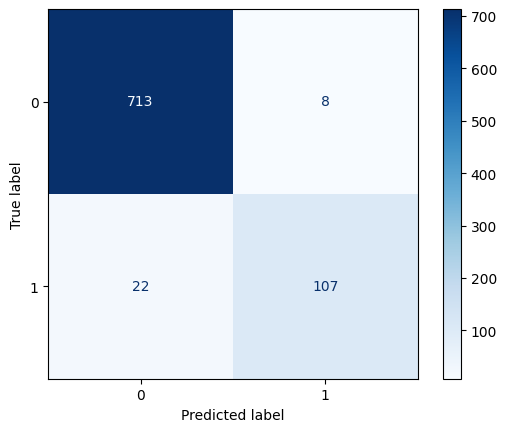

In [38]:
# XGBoost

import xgboost as xgb

model_xgb = xgb.XGBClassifier(random_state=42, n_estimators = 200)
model_xgb.fit(X_train, y_train)


y_pred = model_xgb.predict(X_test)
# In bao cao ket qua
print(classification_report( y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['0', '1'])
cmd.plot(cmap=plt.cm.Blues)
plt.show()


Submit ket qua len Kaggle

In [39]:

test = pd.read_csv("/content/test.csv")
id_submit = test['id']
     

In [40]:

test.drop(columns=['id'], inplace=True)

In [ ]:

test_hash_state = he.fit_transform(test)
test_hash_state.head()

In [42]:
test_dummy =  pd.get_dummies(test_hash_state,drop_first=True)
test_dummy_drop_corr = test_dummy.drop(columns=["voice_mail_plan_yes","total_day_charge","total_eve_charge","total_night_charge","total_intl_charge"])


In [ ]:
test_dummy_drop_corr.columns

In [44]:
y_pred_submit = model_xgb.predict(test_dummy_drop_corr)

In [ ]:
y_pred_submit
     
     

In [ ]:
submit_result = pd.DataFrame({'id': id_submit,'churn': y_pred_submit})
submit_result
     

In [ ]:
submit_result.churn.replace([0,1],['no','yes'],inplace=True)
submit_result

In [48]:
submit_result.to_csv("Customer_Churn_Prediction.csv", index=False)